In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import tensorflow as tf
import os
import keras
import random
import shutil
from matplotlib.image import imread
from pathlib import Path
import shutil
import random
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization,Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import files
files.upload()

Saving kaggle-4.json to kaggle-4 (1).json


{'kaggle-4 (1).json': b'{"username":"testkaggle123123","key":"3012faec5be70d0a7299c41cd95e6ed5"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle-4.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle-4.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

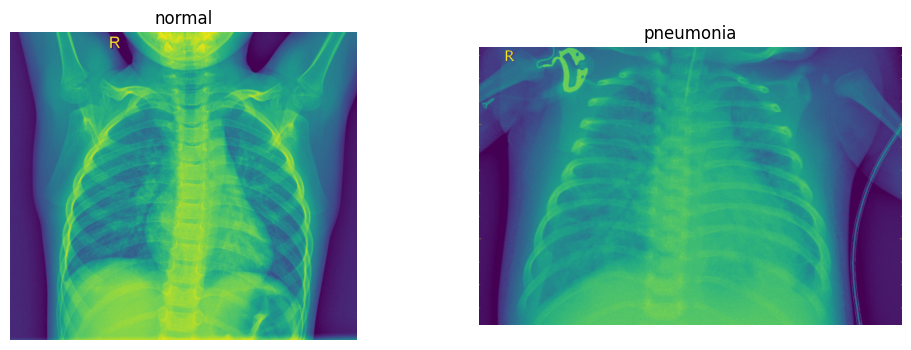

In [ ]:
normal = "/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg"
pneumonia = "/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg"

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.imshow(imread(normal))
plt.title("normal")
plt.axis("off")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(imread(pneumonia))
plt.title("pneumonia")

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size=(156, 156),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size=(156, 156),
    batch_size=20,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [ ]:
Model = Sequential()
Model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape = (156, 156,3)))

Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))
Model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Conv2D(16,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
Model.add(MaxPooling2D(pool_size=(2,2),strides=1,padding = 'valid'))

Model.add(Flatten())
Model.add(Dense(128,activation = 'relu'))

Model.add(Dense(1,activation = 'sigmoid'))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
optimizer = Adam(learning_rate=0.0001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
Model.compile(loss = 'binary_crossentropy',optimizer = optimizer,metrics = ['accuracy'])

In [ ]:
Model.fit(train_generator ,validation_data=test_generator ,epochs = 20, callbacks=[early_stop, reduce_lr])

Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 105s 401ms/step - accuracy: 0.9180 - loss: 0.1981 - val_accuracy: 0.8326 - val_loss: 0.3626 - learning_rate: 5.0000e-05
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 103s 396ms/step - accuracy: 0.9202 - loss: 0.1973 - val_accuracy: 0.9204 - val_loss: 0.1966 - learning_rate: 5.0000e-05
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 105s 402ms/step - accuracy: 0.9247 - loss: 0.1929 - val_accuracy: 0.9178 - val_loss: 0.1937 - learning_rate: 5.0000e-05
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 108s 413ms/step - accuracy: 0.9250 - loss: 0.1896 - val_accuracy: 0.8867 - val_loss: 0.2592 - learning_rate: 5.0000e-05
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 107s 409ms/step - accuracy: 0.9314 - loss: 0.1720 - val_accuracy: 0.9296 - val_loss: 0.1725 - learning_rate: 5.0000e-05
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 103s 395ms/step - accuracy: 0.9295 - loss: 0.1691 - val_accuracy: 0.9369 - val_loss: 0.1617 - learning_rate: 5.0000e-05
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 

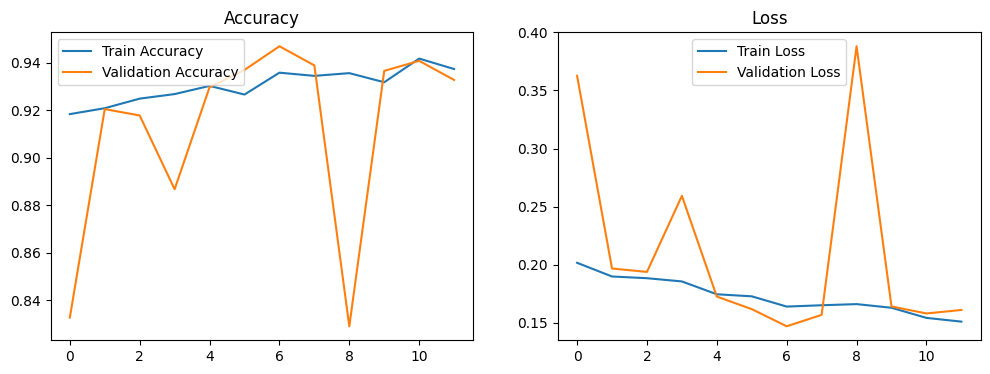

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(Model.history.history['accuracy'], label='Train Accuracy')
plt.plot(Model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(Model.history.history['loss'], label='Train Loss')
plt.plot(Model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [ ]:
import tensorflow as tf
import os
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

model_path = 'model_quantized-mayana2.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)

size_in_bytes = os.path.getsize(model_path)
size_in_mb = size_in_bytes / 1024 / 1024

print(f"Quantized Model Size: {size_in_mb:.2f} MB")

Saved artifact at '/tmp/tmpjv6htybt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 156, 156, 3), dtype=tf.float32, name='keras_tensor_92')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134305110473040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134305110473616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134305111246800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134305111249872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134304170559248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134304170562320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134304170558096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134304170563088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134304170562512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134304170564048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13430417056

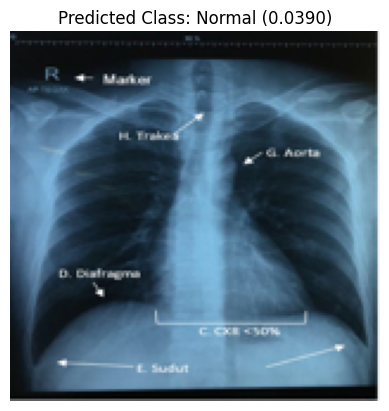

In [2]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

interpreter = tf.lite.Interpreter(model_path="/content/model_quantized-mayana2.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

image_path = '/content/Foto-Rontgen-Toraks-2_Immanuela_2018.png'
img = Image.open(image_path).convert("RGB")

input_shape = input_details[0]['shape']
target_height, target_width = input_shape[1], input_shape[2]
expected_channels = input_shape[3]

img = img.resize((target_width, target_height))

img_array = np.array(img).astype(np.float32) / 255.0

if img_array.shape[-1] != expected_channels:
    img_array = np.stack((img_array,) * expected_channels, axis=-1)

img_array = np.expand_dims(img_array, axis=0)

interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()

predictions = interpreter.get_tensor(output_details[0]['index'])

probability = predictions[0][0]

class_labels = ['Normal', 'Pneumonia']
predicted_class = 1 if probability >= 0.5 else 0
predicted_label = class_labels[predicted_class]

plt.title(f"Predicted Class: {predicted_label} ({probability:.4f})")
plt.imshow(img)
plt.axis('off')
plt.show()